In [87]:
import numpy as np
import pandas as pd
import seaborn as sb

# Standarization and Normalization

In [88]:
df=pd.read_csv("titanic_train.csv")

In [89]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [90]:
columns=['pclass','age','fare','survived']
df=df[columns]

In [91]:
df.head()

,pclass,age,fare,survived
0,3,NaN,7.7333,1
1,3,38.0,8.6625,0
2,3,30.0,24.1500,0
3,2,54.0,23.0000,1
4,2,40.0,13.0000,0


In [92]:
df['age'].fillna(df['age'].median(),inplace=True)
df['fare'].fillna(df['fare'].median(),inplace=True)

In [93]:
df.head()

,pclass,age,fare,survived
0,3,28.0,7.7333,1
1,3,38.0,8.6625,0
2,3,30.0,24.1500,0
3,2,54.0,23.0000,1
4,2,40.0,13.0000,0


In [94]:
df.isnull().sum()

pclass      0
age         0
fare        0
survived    0
dtype: int64

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [97]:
data=pd.DataFrame(df_scaled)

In [98]:
data.head()

,0,1,2,3
0,0.811420,-0.093041,-0.489422,1.309830
1,0.811420,0.676701,-0.472102,-0.763458
2,0.811420,0.060908,-0.183408,-0.763458
3,-0.381845,1.908287,-0.204845,1.309830
4,-0.381845,0.830649,-0.391249,-0.763458


In [99]:
import matplotlib.pyplot as plt

(array([544., 144.,  71.,  34.,  13.,  14.,   3.,   0.,  14.,   1.,   9.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.63357408, -0.15607285,  0.32142839,  0.79892962,  1.27643086,
         1.75393209,  2.23143333,  2.70893456,  3.18643579,  3.66393703,
         4.14143826,  4.6189395 ,  5.09644073,  5.57394196,  6.0514432 ,
         6.52894443,  7.00644567,  7.4839469 ,  7.96144813,  8.43894937,
         8.9164506 ]),
 <a list of 20 Patch objects>)

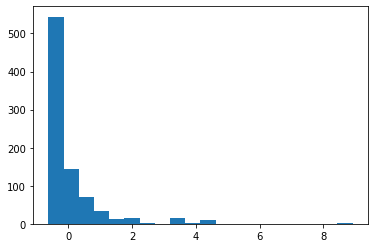

In [100]:
plt.hist(df_scaled[:,2],bins=20)

# MinMax Scaling 

In [101]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=min_max.fit_transform(df)

In [102]:
df_minmax=pd.DataFrame(df_minmax,columns=df.columns)

In [103]:
df_minmax.head()

,pclass,age,fare,survived
0,1.0,0.348643,0.015094,1.0
1,1.0,0.473904,0.016908,0.0
2,1.0,0.373695,0.047138,0.0
3,0.5,0.674321,0.044893,1.0
4,0.5,0.498956,0.025374,0.0


(array([688., 105.,  27.,   3.,  15.,   9.,   0.,   0.,   0.,   3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

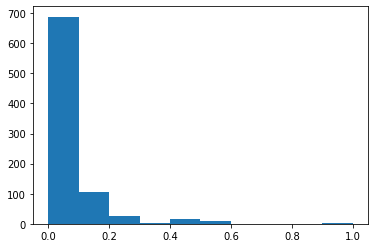

In [104]:
plt.hist(df_minmax["fare"])

# Robust Scalar

In [105]:
from sklearn.preprocessing import RobustScaler

In [106]:
df_robust=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [107]:
df_robust.head()

,pclass,age,fare,survived
0,0.811420,-0.093041,-0.489422,1.309830
1,0.811420,0.676701,-0.472102,-0.763458
2,0.811420,0.060908,-0.183408,-0.763458
3,-0.381845,1.908287,-0.204845,1.309830
4,-0.381845,0.830649,-0.391249,-0.763458


(array([688., 105.,  27.,   3.,  15.,   9.,   0.,   0.,   0.,   3.]),
 array([-0.63357408,  0.32142839,  1.27643086,  2.23143333,  3.18643579,
         4.14143826,  5.09644073,  6.0514432 ,  7.00644567,  7.96144813,
         8.9164506 ]),
 <a list of 10 Patch objects>)

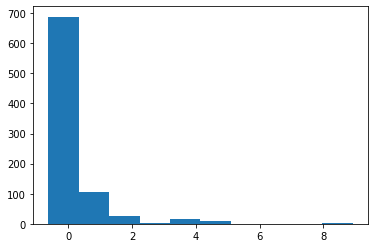

In [108]:
plt.hist(df_robust['fare'])

# Gaussian Transformation
logaritmic
exponential
reciprocal
square root
boxcon

In [109]:
import scipy.stats as stat
import pylab

In [110]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

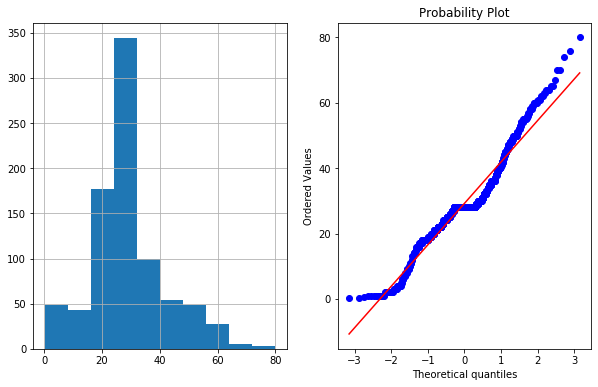

In [111]:
plot_data(df,"age")

# Logaritmic Transformation

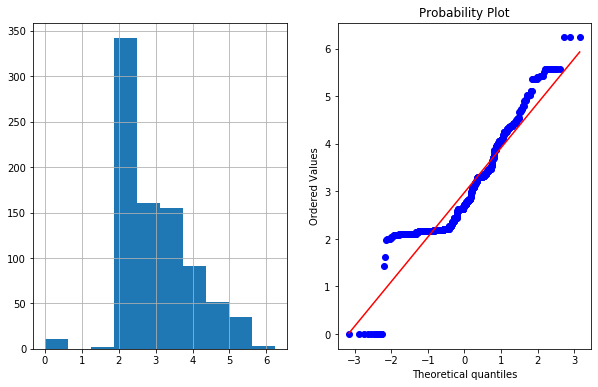

In [127]:
import numpy as np
df['fare_log']=np.log1p(df['fare'])
plot_data(df,'fare_log')

# REciprocal

In [113]:
df['age']=1/df["age"]

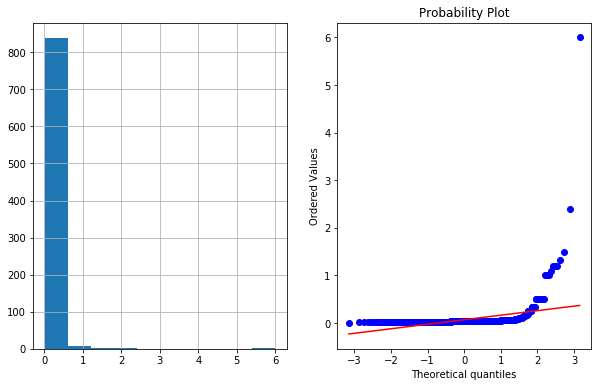

In [114]:
plot_data(df,'age')

Square Root# 

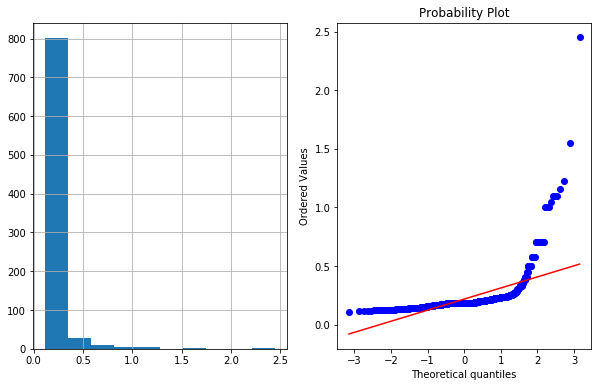

In [115]:
df['age']=df['age']**(1/2)
plot_data(df,'age')

#Exponential Transformation 

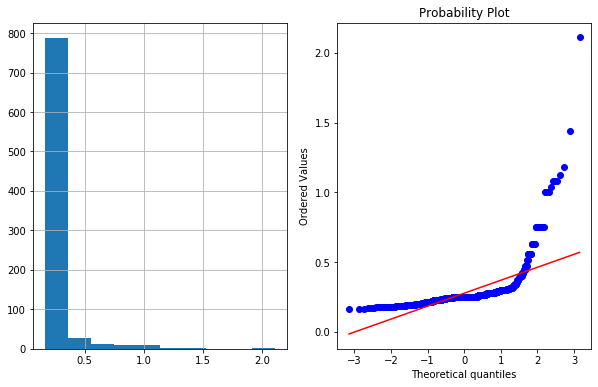

In [116]:
df['age']=df.age**(1/1.2)
plot_data(df,'age')

# Box COX

In [124]:
df['age_box'],parameters= stat.boxcox(df['age'])

In [125]:
print(parameters)

-1.8495188249243364


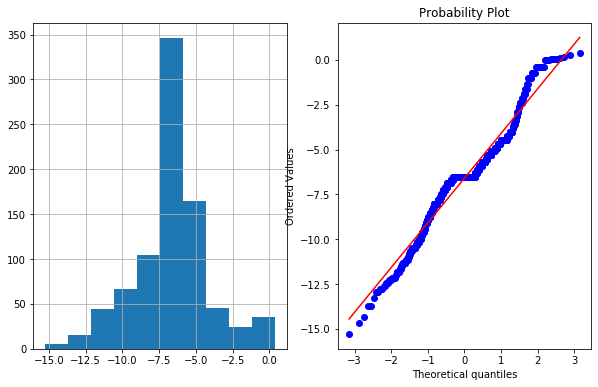

In [126]:
plot_data(df,'age_box')      